In [1]:
from pathlib import Path
import itertools

import numpy as np
# https://matplotlib.org/gallery/lines_bars_and_markers/curve_error_band.html#sphx-glr-gallery-lines-bars-and-markers-curve-error-band-py
from scipy.interpolate import splprep, splev


import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.collections as mcollections
import matplotlib.colors as mcolors
import matplotlib.path as mpath
import matplotlib.pyplot as plt


from matplotlib import rcParams 
import xarray as xr

import themepy
paper_path = Path('../paper/figures/')
slide_path = Path('../slides/figures/math/')
proposal_path = Path('../draft/figures/math/')
theme = themepy.Theme('paper')
rcParams['font.family'] = 'Segoe Print'

%matplotlib inline

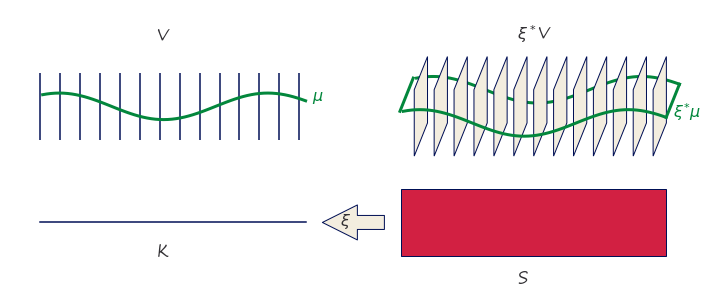

In [2]:
fig, axd  = plt.subplot_mosaic([['k', 's']], figsize=(10,4), 
                                    constrained_layout=True)

facecolor = axd['k'].get_facecolor()
mc = 'C2'

xpos = [.1, .9]
x = np.linspace(-2*np.pi, np.pi*2, 1000)
inds = ((x>xpos[0]) & (x<xpos[-1]))
xin = x[inds]
mu = np.sin(xin*10)*.04 +.5
y = np.cos(xin*10)*.03+.2


axd['k'].vlines(np.arange(xpos[0], xpos[-1],.06), ymin=.45, ymax=.65)
axd['k'].axhline(0.2, xmin=xpos[0], xmax=xpos[-1])
axd['k'].annotate('K', (.45, 0.1), fontsize=16)
axd['k'].plot(xin, mu+.05, mc, linewidth=3, zorder=10)
axd['k'].annotate(r'$\mu$', (xpos[-1]+.02, mu[-1]+.05), fontsize=16, color=mc)
axd['k'].annotate("V", (.45,.75), fontsize=16)
axd['k'].set(aspect='equal', ylim=(0,.85), xlim=[0,1])
b1 = mpatches.Rectangle((xpos[0], 0.1), height=.2, width=(xpos[-1]-xpos[0]), 
                        facecolor='C1', edgecolor='C0')
axd['s'].add_patch(b1)
#axd['s'].plot(x[inds], y, color='C1', linewidth=4)

for off in np.arange(.04,.78,.06):
    verts = np.array([[.1, .4], [.1,.6], [.14, .7], [.14, .5], [.1, .6 ]]) + [off, 0]
    p = mpatches.PathPatch(mpath.Path(verts, closed=True), edgecolor='C0',
                                      facecolor=facecolor)
    axd['s'].add_patch(p)
    

axd['s'].plot(xin, mu, mc, linewidth=3)
axd['s'].plot(xin+.04, mu+.1, color=mc, zorder=-2, linewidth=3)
axd['s'].plot([xin[0]-.01, xin[0]+.03], [mu[0], mu[0]+.1], color=mc, linewidth=3)
axd['s'].plot([xin[-1], xin[-1]+.04], [mu[-1], mu[-1]+.1], color=mc, linewidth=3)
axd['s'].annotate(r'$\xi^{*}\mu$', (xpos[-1]+.02, mu[-1]), fontsize=16, color=mc)
axd['s'].annotate(r"$\xi^*$V", (.45,.75), fontsize=16)
axd['s'].annotate('S', (.45,0.02),  fontsize=16)
axd['s'].set(aspect='equal', ylim=(0,.85), xlim=(0,1))
fig.text(.482,.23, r'$\xi$', fontsize=16)
con_ft = mpatches.ConnectionPatch(xyA=(.05,.2), coordsA=axd['s'].transData,
                        xyB=(.95, .2), coordsB=axd['k'].transData,   
                         arrowstyle="simple", mutation_scale=70, 
                        facecolor=facecolor, edgecolor='C0')
fig.add_artist(con_ft)
axd['k'].axis('off')
axd['s'].axis('off')
fig.savefig(paper_path/"q_hat.png", bbox_inches='tight', facecolor='white')
fig.savefig(proposal_path/"q_hat.png", bbox_inches='tight', facecolor='white')

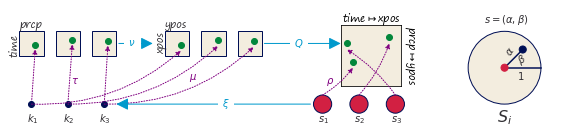

In [3]:
fig, axd = plt.subplot_mosaic([['E', 'V', 'H', 'glyph']], figsize=(10,5))
for k in axd:
    axd[k].set(xlim=(0,1), ylim=(0,1), aspect='equal')
    axd[k].axis('off')
    
ac = '#0099CC'
oc = 'C4'
dc='C2'

yl = .2
xpos = [.2, .5,.8]
s = axd['E'].scatter(xpos, [yl,yl,yl], zorder=100)
yt = [44, 48, 47]
xt = [32,38, 31]
klabs = [r'$k_{1}$', r'$k_{2}$',r'$k_{3}$' ]
slabs = [r'$s_{1}$', r'$s_{2}$',r'$s_{3}$' ]

axsub = axd['H'].inset_axes([.35, .35, .5, .5] )
axsub.set(xticklabels=[], yticklabels=[], ylim=(40,50), xlim=(30,40))
axsub.scatter(xt,yt, color=dc, edgecolor=dc)

for i, (off, kl, sl) in enumerate(zip(xpos, klabs, slabs)):
    verts = np.array([[0, .4], [0,.6], [.2, .6], [.2, .4], [0, .6 ]]) + [off-.1, .2]
    pe = mpatches.PathPatch(mpath.Path(verts, closed=True), edgecolor='C0',
                                      facecolor=facecolor)
    axd['E'].add_patch(pe)
    
    pv = mpatches.PathPatch(mpath.Path(verts, closed=True), edgecolor='C0',
                                      facecolor=facecolor)
    axd['V'].add_patch(pv)
    xp = (xt[i]/1000)+off
    yp = (yt[i]/100)+.25
    axd['E'].scatter(xp,yp, zorder=100, color=dc, edgecolor=dc)
    axd['V'].scatter(xp,yp, zorder=100, color=dc, edgecolor=dc)
    
    axd['E'].annotate(kl,(off-.04, yl-.15))
    axd['H'].annotate(sl,(off-.04, yl-.15))
        
    c = mpatches.Circle((off,yl), radius=.075, edgecolor='C0', facecolor='C1')
    axd['H'].add_patch(c)
   
    
    a1 = mpatches.FancyArrowPatch((off,.2), (xp,yp-.02), arrowstyle="-|>",  
                                  linestyle=':', mutation_scale=10, color=oc)
    axd['E'].add_patch(a1)
    
    a2 = mpatches.ConnectionPatch(xyA=(off,.2), coordsA=axd['E'].transData,
                      xyB=(xp,yp-.05), coordsB=axd['V'].transData,  arrowstyle="-|>",
                                  mutation_scale=10, connectionstyle="arc3,rad=.2",
                                 linestyle=':', color=oc)
    fig.add_artist(a2)
    
    a3 = mpatches.ConnectionPatch(xyA=(off,.2+.075), coordsA=axd['H'].transData,
                      xyB=(xt[i],yt[i]-1), coordsB=axsub.transData,  arrowstyle="-|>",
                                  mutation_scale=10, connectionstyle="arc3,rad=0.1",
                                 linestyle=':', color=oc)
    fig.add_artist(a3)
    
    
    
a3 = mpatches.ConnectionPatch(xyA=(0.1,yl), coordsA=axd['H'].transData,
                      xyB=(xpos[-1]+.1, yl), coordsB=axd['E'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a3)
atext_kw = {'color':ac, 'va':'center', 'ha':'center', 'zorder':10, 'bbox':{'color':'white'}}
fig.text(-.6, a3.xy1[1], r'$\xi$', transform=axd['H'].transData, **atext_kw)

a4 = mpatches.ConnectionPatch(xyA=(0.92,.7), coordsA=axd['E'].transData,
                      xyB=(0, .7), coordsB=axd['V'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a4)
fig.text(1.03, .7, r'$\nu$', transform=axd['E'].transData, **atext_kw)

a5 = mpatches.ConnectionPatch(xyA=(0.92,.7), coordsA=axd['V'].transData,
                      xyB=(.35, .7), coordsB=axd['H'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a5)
fig.text(1.2, .7, r'$Q$', transform=axd['V'].transData, **atext_kw)




axd['E'].annotate('prcp', (.1, .83))
axd['E'].annotate('time', (0.01, .62), rotation=90)

axd['V'].annotate('ypos',  (.1, .83))
axd['V'].annotate('xpos',  (0.01, .65), rotation=90)

#axd['H'].annotate('time'+r'$\mapsto$'+'xpos', (.35, .865))
#axd['H'].annotate('temp'+r'$\mapsto$'+'ypos', (.85, .4), rotation=-90)


axsub.xaxis.set_label_position('top')
axsub.yaxis.set_label_position('right')
axsub.set_xlabel('time'+r'$\mapsto$'+'xpos')
axsub.set_ylabel('prcp'+r'$\mapsto$'+'ypos', rotation=270, labelpad=15)
axsub.set(xticklabels=[], yticklabels=[]) 
axsub.tick_params(length=0)

axd['E'].annotate(r'$\tau$',(0.53, 0.37), color=oc)
axd['V'].annotate(r'$\mu$', (.3, .4), color=oc)
axd['H'].annotate(r'$\rho$', (.23, .37), color=oc)

sc = mpatches.Circle((.5,.5), radius=.3, edgecolor='C0', facecolor=facecolor)
axd['glyph'].add_patch(sc)
axd['glyph'].annotate(r"$S_i$", (.44,0.05), fontsize=16)
axd['glyph'].annotate(r'$s=(\alpha, \beta)$', (.33, .87))
axd['glyph'].plot([.5, .8], [.5, .5], color='C0')
axd['glyph'].plot([.5,.65], [.5, .65], color='C0')
axd['glyph'].scatter([.5, .65], [.5, .65], c=['C1','C0'], s=50, zorder=100)
axd['glyph'].annotate(r'$\alpha$', (.49, .60), rotation=55)
axd['glyph'].annotate(r'$\beta$', (.59, .53), rotation=30)
axd['glyph'].annotate(r'$1$', (.6, .4))
axd['glyph'].axis('off')
fig.savefig(slide_path/"scatter_with_s.png", bbox_inches='tight', facecolor='white' )
fig.savefig(proposal_path/"scatter_with_s.png", bbox_inches='tight', facecolor='white' )

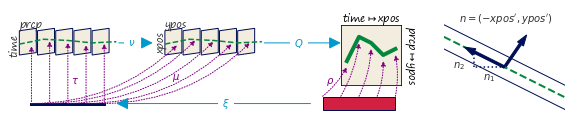

In [4]:
fig, axd = plt.subplot_mosaic([['E', 'V', 'H', 'glyph']], figsize=(10,5))
for k in axd:
    axd[k].set(xlim=(0,1), ylim=(0,1), aspect='equal')
    axd[k].axis('off')
    
ac = '#0099CC'
oc = 'C4'
dc = 'C2'

yl = .2
xpos = [.2, .8]
s = axd['E'].axhline(yl, xmin=xpos[0], xmax=xpos[-1], linewidth=3, zorder=10)
yt = np.array([44, 48, 47, 45, 46])
xt = np.array([1,3,5,7,9])

r = mpatches.Rectangle((xpos[0], .15), height=.1, width=xpos[1]-xpos[0], 
                        facecolor='C1', edgecolor='C0') 
axd['H'].add_patch(r)
axsub = axd['H'].inset_axes([.35, .35, .5, .5] )
axsub.set(xticklabels=[], yticklabels=[], ylim=(40,50), xlim=(0,10))
axsub.plot(xt,yt, color=dc, linewidth=4)

xp = (xt/10)
yp = (yt/100)+.25


axd['E'].plot(xp,yp, zorder=100, color=dc, linestyle='--')
axd['V'].plot(xp,yp, zorder=100, color=dc, linestyle='--')
#axd['H'].plot(xp[:-1]+.1, yp[:-1]-.52, color='C1', linewidth=3 )

for i, off in enumerate(np.arange(xpos[0], xpos[-1], .15)):
    verts = np.array([[0, .4], [0,.6], [.14, .62], [.14, .42], [0, .6 ]]) + [off-.1, .2]
    pe = mpatches.PathPatch(mpath.Path(verts, closed=True), edgecolor='C0',
                                      facecolor=facecolor)
    axd['E'].add_patch(pe)
    
    pv = mpatches.PathPatch(mpath.Path(verts, closed=True), edgecolor='C0',
                                      facecolor=facecolor)
    axd['V'].add_patch(pv)
    
    a1 = mpatches.FancyArrowPatch((off, yl), (off,yp[i]), arrowstyle="-|>",  
                                  linestyle=':', mutation_scale=10, color=oc)
    axd['E'].add_patch(a1)
    
    a2 = mpatches.ConnectionPatch(xyA=(off,yl), coordsA=axd['E'].transData,
                      xyB=(off,yp[i]-.01), coordsB=axd['V'].transData,  arrowstyle="-|>",
                                  mutation_scale=10, connectionstyle="arc3,rad=.2",
                                 linestyle=':', color=oc)
    fig.add_artist(a2)
    
    a3 = mpatches.ConnectionPatch(xyA=(off,yl+.06), coordsA=axd['H'].transData,
                      xyB=(xt[i],yt[i]-1), coordsB=axsub.transData,  arrowstyle="-|>",
                                  mutation_scale=10, connectionstyle="arc3,rad=0.1",
                                 linestyle=':', color=oc)
    fig.add_artist(a3)
    
    
    
a3 = mpatches.ConnectionPatch(xyA=(0.1,yl), coordsA=axd['H'].transData,
                      xyB=(xpos[-1]+.1, yl), coordsB=axd['E'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a3)

atext_kw = {'color':ac, 'va':'center', 'ha':'center', 'zorder':10, 'bbox':{'color':'white'}}

fig.text(-.6, a3.xy1[1], r'$\xi$', transform=axd['H'].transData, **atext_kw)

a4 = mpatches.ConnectionPatch(xyA=(0.92,.7), coordsA=axd['E'].transData,
                      xyB=(0, .7), coordsB=axd['V'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a4)
fig.text(1.03, a4.xy1[1], r'$\nu$', transform=axd['E'].transData, **atext_kw)

a5 = mpatches.ConnectionPatch(xyA=(0.92,.7), coordsA=axd['V'].transData,
                      xyB=(.35, .7), coordsB=axd['H'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a5)
fig.text(1.2, a5.xy1[1], r'$Q$', transform=axd['V'].transData, **atext_kw)




axd['E'].annotate('prcp', (.1, .83))
axd['E'].annotate('time', (0.01, .62), rotation=90)

axd['V'].annotate('ypos',  (.1, .83))
axd['V'].annotate('xpos',  (0.01, .65), rotation=90)

#axd['H'].annotate('time'+r'$\mapsto$'+'xpos', (.35, .865))
#axd['H'].annotate('temp'+r'$\mapsto$'+'ypos', (.85, .4), rotation=-90)

axsub.xaxis.set_label_position('top')
axsub.yaxis.set_label_position('right')
axsub.set_xlabel('time'+r'$\mapsto$'+'xpos')
axsub.set_ylabel('prcp'+r'$\mapsto$'+'ypos', rotation=270, labelpad=15)
axsub.set(xticklabels=[], yticklabels=[]) 
axsub.tick_params(length=0)

axd['E'].annotate(r'$\tau$',(0.53, 0.37), color=oc)
axd['H'].annotate(r'$\rho$', (.23, .37), color=oc)
axd['V'].annotate(r'$\mu$', (.16, .4), color=oc)

axd['glyph'].set(ylim=(46.5,48.5), xlim=(4, 6), aspect='equal')
axd['glyph'].plot(xt[1:3]+1, yt[1:3], color=dc, linewidth=2, linestyle='--' )
axd['glyph'].plot(xt[1:3]+1, yt[1:3]-.2, color='C0', linewidth=1)
axd['glyph'].plot(xt[1:3]+1, yt[1:3]+.2, color='C0', linewidth=1)
axd['glyph'].arrow(5.0, 47.5, np.cos(45)*.5, np.sin(45)*.45, width=.04, color='C0')
axd['glyph'].arrow(5.0, 47.5, -.5, .25, zorder=10, width=.04, color='C0')
axd['glyph'].plot([5, 5-.5], [47.5, 47.5], linestyle=':', color='C0')
axd['glyph'].plot([5-.5, 5.-.5], [47.5, 47.5+.25], linestyle=':', color='C0')
axd['glyph'].annotate(r'$n_1$', (4.65, 47.3), fontweight='black')
axd['glyph'].annotate(r'$n_2$', (4.15, 47.5), fontweight='black')
axd['glyph'].annotate(r'$n=(-xpos^{\prime}, ypos^{\prime})$', (4.25, 48.25))
fig.savefig(slide_path/"line_with_s.png", bbox_inches='tight', facecolor='white' )
fig.savefig(proposal_path/"line_with_s.png", bbox_inches='tight', facecolor='white' )

In [5]:
ds = xr.open_dataset('ndviavhrr19812001.nc')

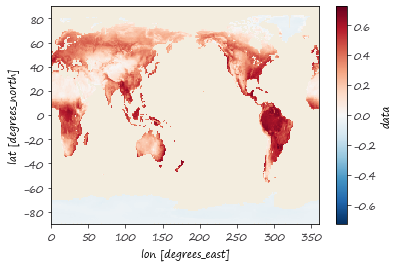

In [6]:
ds['data'].mean('time').plot()

In [7]:
ds['data'].mean('time').plot

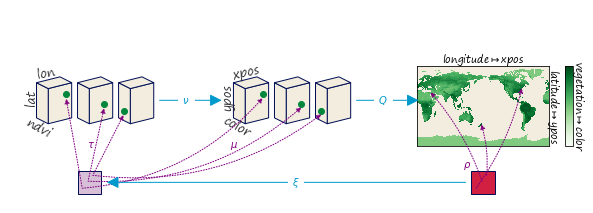

In [8]:
fig, axd = plt.subplot_mosaic([['E', 'V', 'H']], figsize=(10,5))

axd['E'].set(xlim=(-0.2,1.2), ylim=(-0.2,1.5), aspect='equal')
axd['V'].set(xlim=(-0.2,1.2), ylim=(-0.2,1.5), aspect='equal')
axd['H'].set(xlim=(-.2,1.2), ylim=(-0.2,1.5), aspect='equal')

    
ac = '#0099CC'
oc = 'C4'
dc = 'C2'

r = mpatches.Rectangle((0.4,-0.1), .2, .2, facecolor='#D8BFD8', edgecolor='C0')
s = axd['E'].add_patch(r)

r2 = mpatches.Rectangle((0.4,-0.1), .2, .2, facecolor='C1', edgecolor='C0')
s = axd['H'].add_patch(r2)

smile = mpatches.Circle((.5,0), radius=.075, 
                        facecolor=facecolor, edgecolor='C1', hatch='Ox')
#axd['H'].add_patch(smile)


#axsub.set(xticklabels=[], yticklabels=[], ylim=(-0.2,1.2), xlim=(-0.2,1.2))

#smileB =  mpatches.Circle((.5,.5), radius=.65, facecolor=facecolor, 
                          #edgecolor=dc, hatch='Ox')
#axsub.add_patch(smileB)

                          

x = [.3, .63, .80]
y = [.75, .67, .61]
xi = [.44,.49, .53]
yi = np.array([.05, .11, .16])-.1
imap = [(40.7128, -74.0060%360), (31.7683, 35.2137), (-40.9006, 174.8860)]
    
axd['E'].scatter(x,y, color=dc, zorder=10)
axd['V'].scatter(x,y, color=dc, zorder=10)


data = ds['data'].mean('time')
axsub = axd['H'].inset_axes([.1, .3, .8, .4] )
axcub = axd['H'].inset_axes([1, .3, .05, .4])
im = data.plot(ax=axsub, cmap='Greens', add_colorbar=False)
cb = plt.colorbar(im, cax=axcub, ticks=[],fraction=35)

for i, off in enumerate([-.05, .3, .65]):

    verts = np.array([[[.2,.4], [.2,.7], [.4, .75], [.4,.45]],
                 [[.1,.75],[.1,.45],[.2,.4],[.2,.7]],
                 [[.1, .75], [.3, .8],[.4, .75], [.2,.7]]])+[off, +.1]
 
    pe = mcollections.PolyCollection(verts, edgecolor='C0', facecolor=facecolor )
    axd['E'].add_collection(pe)

    pv = mcollections.PolyCollection(verts, edgecolor='C0', facecolor=facecolor )
    axd['V'].add_collection(pv)

    a1 = mpatches.FancyArrowPatch((xi[i], yi[i]), (x[i],y[i]-.02), arrowstyle="-|>",  
                                  linestyle=':', mutation_scale=10, color=oc)
    axd['E'].add_patch(a1)
    
    a2 = mpatches.ConnectionPatch(xyA=(xi[i],yi[i]), coordsA=axd['E'].transData,
                      xyB=(x[i],y[i]-.03), coordsB=axd['V'].transData,  arrowstyle="-|>",
                                  mutation_scale=10, connectionstyle="arc3,rad=.2",
                                 linestyle=':', color=oc)
    fig.add_artist(a2)
    
    a3 = mpatches.ConnectionPatch(xyA=(xi[i],yi[i]), coordsA=axd['H'].transData,
                      xyB=(imap[i][1],imap[i][0]), coordsB=axsub.transData,  arrowstyle="-|>",
                                  mutation_scale=10, connectionstyle="arc3,rad=0.1",
                                 linestyle=':', color=oc)
    fig.add_artist(a3)
    

axd['E'].annotate(r'$\tau$',(0.48, 0.30), color=oc)
axd['V'].annotate(r'$\mu$', (.022, .3), color=oc)
axd['H'].annotate(r'$\rho$', (.33, .13), color=oc, zorder=10)

a3 = mpatches.ConnectionPatch(xyA=(0.35, 0), coordsA=axd['H'].transData,
                      xyB=(.65, 0), coordsB=axd['E'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a3)
atext_kw = {'color':ac, 'va':'center', 'ha':'center', 'zorder':10, 'bbox':{'color':'white'}}

fig.text(-1.1, a3.xy1[1], r'$\xi$', transform=axd['H'].transData, **atext_kw)

a4 = mpatches.ConnectionPatch(xyA=(1.1,.7), coordsA=axd['E'].transData,
                      xyB=(-.05, .7), coordsB=axd['V'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a4)
fig.text(1.325, a4.xy1[1], r'$\nu$', transform=axd['E'].transData, **atext_kw)

a5 = mpatches.ConnectionPatch(xyA=(1.1,.7), coordsA=axd['V'].transData,
                      xyB=(-0.05, .7), coordsB=axd['H'].transData,  arrowstyle="-|>",
                                  mutation_scale=25, zorder=10, color=ac)
fig.add_artist(a5)
fig.text(1.325, a5.xy1[1], r'$Q$', transform=axd['V'].transData, **atext_kw)

axd['E'].text(.04,.89, 'lon', rotation=12, fontsize=12)
axd['E'].text(-.06,.69, 'lat', rotation=90, fontsize=12)
axd['E'].text(-.06,.39, 'ndvi', rotation=-30, fontsize=12)

axd['V'].text(.04,.89, 'xpos', rotation=12, fontsize=12)
axd['V'].text(-.06,.65, 'ypos', rotation=90, fontsize=12)
axd['V'].text(-.06,.39, 'color', rotation=-30, fontsize=12)



cb.set_label('vegetation'+r'$\mapsto$'+'color', rotation=270, labelpad=13)
axsub.xaxis.set_label_position('top')
axsub.yaxis.set_label_position('right')
axsub.set_xlabel('longitude'+r'$\mapsto$'+'xpos')
axsub.set_ylabel('latitude'+r'$\mapsto$'+'ypos', rotation=270, labelpad=12)
axsub.set(xticklabels=[], yticklabels=[]) 
axsub.tick_params(length=0)
for k in axd:
    axd[k].axis('off')

fig.savefig(proposal_path/"image.png", bbox_inches='tight' , facecolor='white')

In [9]:
from datetime import datetime, timedelta
dt = datetime.utcnow() - timedelta(days=1)  # This should always be available
url = 'http://water.weather.gov/precip/downloads/{dt:%Y/%m/%d}/nws_precip_1day_'\
      '{dt:%Y%m%d}_conus.nc'.format(dt=dt)

In [12]:
ds = xr.open_dataset('nws_precip_1day_20210425_conus.nc')

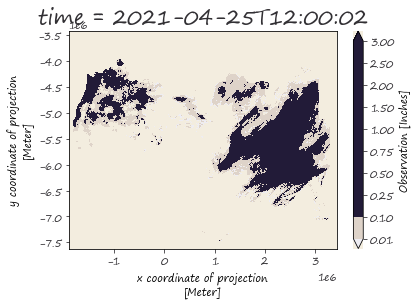

In [24]:
import cmocean

clevs = levels = [0.01, 0.1, 0.25, 0.50, 0.75, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0,
          6.0, 8.0, 10., 20.0]
cmap = cmocean.cm.rain
norm = mcolors.BoundaryNorm(clevs[:10], cmap.N)
ds['observation'].where(ds['observation']>0).plot(cmap=cmap, norm=norm)